# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no estilo de vida.

Existem hoje várias pesquisas na área de Machine Learning visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista na revista Nature Biomedical Engineering mostram que algoritmos de Deep Learning foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.

## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [40]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

In [3]:
display(df)
display(df_brasil)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672
5,2012,333.295
6,2011,335.213
7,2010,326.371
8,2009,320.074
9,2008,317.797


Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [4]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [7]:
# converter valores >= 1 em 1
df.loc[df['num'] != 0, 'num'] = 1

In [8]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

#### dimensões do data frame

In [9]:
print(f"o data frame possui {df.shape[1]} atributos e {df.shape[0]} entradas")

o data frame possui 14 atributos e 303 entradas


#### Análise estatistica do data frame

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [14]:
print(f"Existem cerca de {df[df['num'] == 0].shape[0]} pessoas que não apresentam doenças cardiacas")
print(f"Existem cerca de {df[df['num'] != 0].shape[0]} pessoas que apresentam doenças cardiacas")

Existem cerca de 164 pessoas que não apresentam doenças cardiacas
Existem cerca de 139 pessoas que apresentam doenças cardiacas


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

O data frame não apresenta valores ausentes

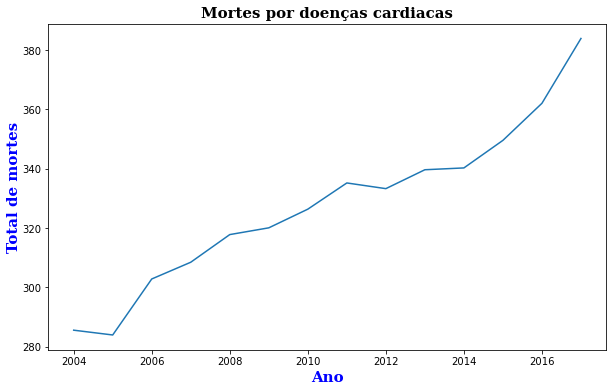

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df_brasil["ano"], df_brasil["mortes_doencas_cardio"])
#configuração e estilos do titulo
plt.title("Mortes por doenças cardiacas", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'black' }, loc = 'center', )
#configuração e estilos do label x
plt.xlabel("Ano", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center', )
#configuração e estilos do label y
plt.ylabel("Total de mortes", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center') 
plt.show()

Veja que o número de mortes por problemas cardiacos, aumentam repentinamente a partie de 2004,
se analisarmos em nivel macro economico, podemos relacionar que coincide com o aumento do poder aquisitivo da população, levando ao maior consumo de produtos superfulos, a alimentação tende  ainfluenciar muito na saude, seria isso uma relaçao de causa e efeito?

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [53]:
df['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

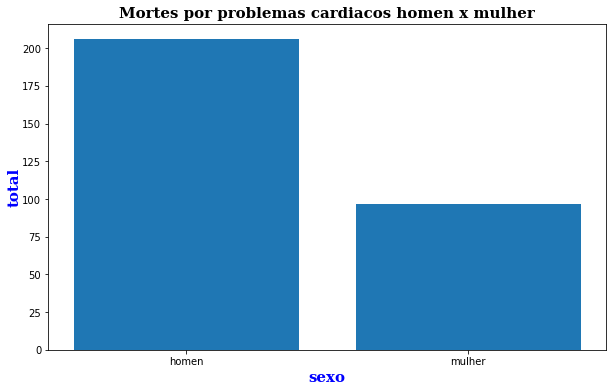

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(['homen', 'mulher'], df['sex'].value_counts())


#configuração e estilos do titulo
plt.title("Mortes por problemas cardiacos homen x mulher", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'black' }, loc = 'center', )
#configuração e estilos do label x
plt.xlabel("sexo", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center', )
#configuração e estilos do label y
plt.ylabel("total", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')

plt.show()


In [78]:
p1 = df[df['age'] <= 30]['chol'].mean()
p2 = df[(df['age'] > 30) & (df['age'] <= 40)]['chol'].mean()
p3 = df[(df['age'] > 40) & (df['age'] <= 50)]['chol'].mean()
p4 = df[(df['age'] > 50) & (df['age'] <= 60)]['chol'].mean()
p5 = df[(df['age'] > 60) & (df['age'] <= 70)]['chol'].mean()
p6 = df[df['age'] > 70]['chol'].mean()

In [79]:
ages = [30, 40, 50, 60, 70, 80]
means = [p1, p2, p3, p4, p5, p6]

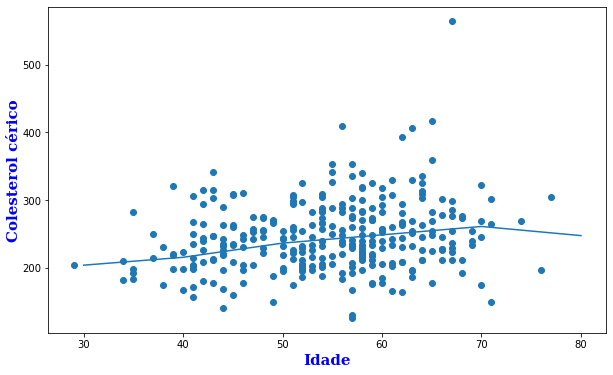

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(df['age'], df['chol'])
plt.plot(ages, means)

#configuração e estilos do label x
plt.xlabel("Idade", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center', )
#configuração e estilos do label y
plt.ylabel("Colesterol cérico", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')
#legenda automatica configuração e posicionamento da 

plt.show()


existe um aumento na media de colesterol cérico a medida que a idade avança, não é possivel enxergar com o grafico scatter plot, porém passando uma linha com a media de colesterol cerico por faixa de idade fica mais evidente

In [89]:
df['restecg'].value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

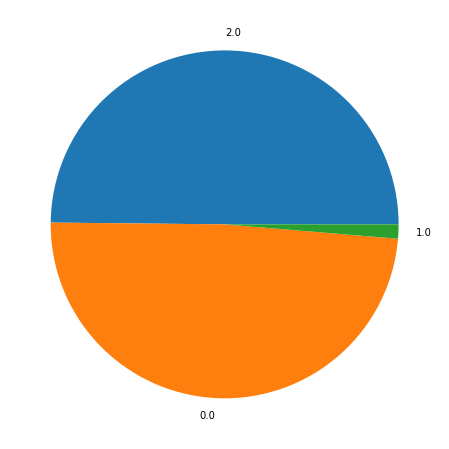

In [90]:
fig, ax = plt.subplots(figsize=(14,8))
plt.pie(df['restecg'].value_counts(), labels=df['restecg'].unique())

plt.show()